# Función de distribución de probabilidades 

## Distribución uniforme 

In [58]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
a=1
b=100
n=1000000
data=np.random.uniform(a,b,n)

(array([100016.,  99617., 100060.,  99688.,  99948., 100604.,  99799.,
        100230., 100024., 100014.]),
 array([ 1.00012872, 10.90011397, 20.80009921, 30.70008446, 40.6000697 ,
        50.50005495, 60.40004019, 70.30002544, 80.20001068, 90.09999593,
        99.99998117]),
 <a list of 10 Patch objects>)

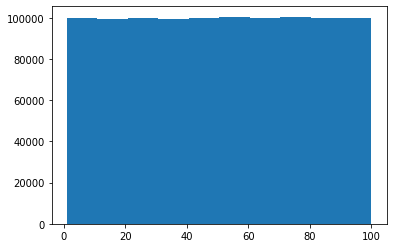

In [16]:
%matplotlib inline
plt.hist(data)

# Distribución normal - Campana Gaussiana

In [32]:
#números aleatorios de este modo 
data=np.random.randn(1000000)

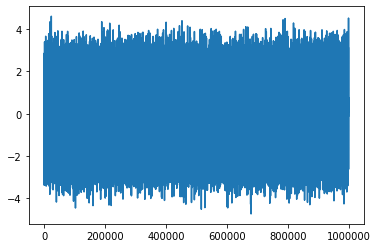

In [33]:
x=range(1,1000001)
plt.plot(x,data)

(array([8.50000e+01, 1.98400e+03, 2.45620e+04, 1.32923e+05, 3.16077e+05,
        3.33139e+05, 1.55947e+05, 3.22180e+04, 2.94400e+03, 1.21000e+02]),
 array([-4.73644711, -3.80148898, -2.86653085, -1.93157271, -0.99661458,
        -0.06165644,  0.87330169,  1.80825982,  2.74321796,  3.67817609,
         4.61313422]),
 <a list of 10 Patch objects>)

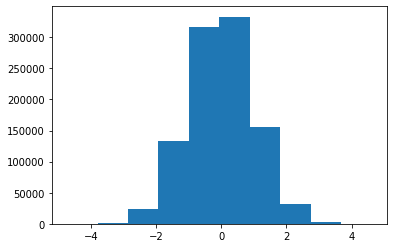

In [34]:
plt.hist(data) #tiene pinta de campana, si genero más se acerca más 

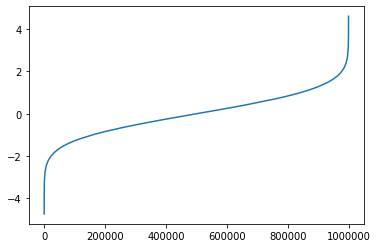

In [35]:
plt.plot(x,sorted(data))

Contrastar que se trata de una función gaussiana pintar los datos ordenados 

(array([   6.,   56.,  322., 1297., 2679., 3032., 1818.,  642.,  133.,
          15.]),
 array([-4.7897543 , -2.82253181, -0.85530933,  1.11191315,  3.07913563,
         5.04635811,  7.0135806 ,  8.98080308, 10.94802556, 12.91524804,
        14.88247053]),
 <a list of 10 Patch objects>)

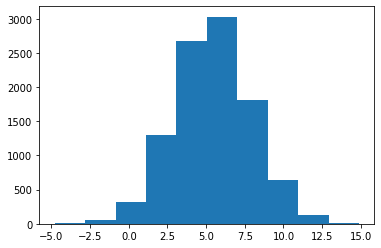

In [38]:
mu= 5.5
sd=2.5 
Z=np.random.randn(10000)
data=mu+sd*Z #x=mu+sd*Z
plt.hist(data)

In [39]:
data=np.random.randn(2,4)
data #generar datasets aleatorios.

array([[-8.89281313e-01,  2.36807099e-01,  1.03875026e+00,
        -1.32984122e+00],
       [-1.13636312e+00, -4.55634108e-04, -7.07598737e-01,
        -2.01673549e-01]])

# Simulación de Monte Carlo

Generamos dos números aleatorios uniformes x e y entre 0 y 1
* Calcular x*x + y+y (ecuación círculo)
    * si el valor es inferior a 1 -> estamos dentro del círculo
    * si el valor es superior a 1 -> estamos fuera del círculo 

* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de probabilidad de caer dentro del círculo, esta probabilidad la usamos para aproximar el valor de pi. 
* Repetimos el experimento un número suficiente de veces (1000) para obtener diferentes aproximaciones de pi
* Promedio de experimentos anteriores para dar un número cercano a pi. 
    

In [56]:
#Variables uniformes igual de probables e ir promediando 
def pi_montecarlo(n, n_exp):
    pi_avg=0 
    pi_value_list=[]
    for i in range(100):
        value=0
        x=np.random.uniform(0,1,n).tolist()
        y=np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z=np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z<=1:
                value+=1
        float_value=float(value)
        pi_value=float_value*4/n
        pi_value_list.append(pi_value)
        pi_avg+=pi_value
    pi = pi_avg/100

    fig=plt.plot(pi_value_list)
    print(pi)
    return (pi, fig)


3.1422719999999997


(3.1422719999999997, [<matplotlib.lines.Line2D at 0x1d82ae65e08>])

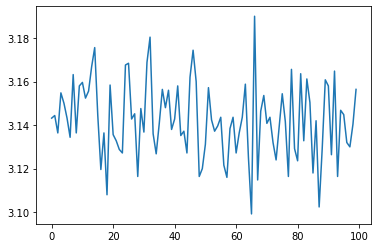

In [57]:
pi_montecarlo(10000,200)

## Dummy Data Sets 

Lista o un arreglo de números aleatorios generados por varios métodos, se obtiene un vector columna, se pasan como columnas. Se utiliza pandas. 

In [66]:
n=1000000
data=pd.DataFrame(
    {
        'A': np.random.randn(n), #normal 0 y 1 
        'B': 1.5*2.5*np.random.randn(n), #normal, media 1,5 y sd 2,5
        'C': np.random.uniform(5,32,n), #uniforme entre 5 y 32 
    }
)

In [69]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000320,0.003893,18.493464
std,0.999246,3.748441,7.795830
min,-4.718374,-17.453630,5.000077
25%,-0.674325,-2.530602,11.733800
50%,0.000048,0.003715,18.492957
75%,0.673473,2.536369,25.241029
max,5.000396,17.914924,31.999912


(array([8.10000e+01, 2.62800e+03, 3.28260e+04, 1.67386e+05, 3.53302e+05,
        3.11054e+05, 1.14200e+05, 1.73630e+04, 1.12700e+03, 3.30000e+01]),
 array([-4.71837412, -3.74649709, -2.77462006, -1.80274303, -0.830866  ,
         0.14101103,  1.11288806,  2.08476509,  3.05664212,  4.02851915,
         5.00039618]),
 <a list of 10 Patch objects>)

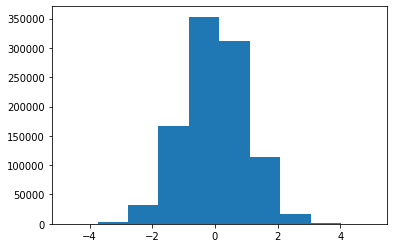

In [70]:
plt.hist(data["A"])

(array([1.10000e+02, 2.74800e+03, 3.11810e+04, 1.54761e+05, 3.35533e+05,
        3.17883e+05, 1.32217e+05, 2.36270e+04, 1.86800e+03, 7.20000e+01]),
 array([-17.4536295 , -13.91677413, -10.37991875,  -6.84306338,
         -3.306208  ,   0.23064737,   3.76750275,   7.30435812,
         10.8412135 ,  14.37806887,  17.91492424]),
 <a list of 10 Patch objects>)

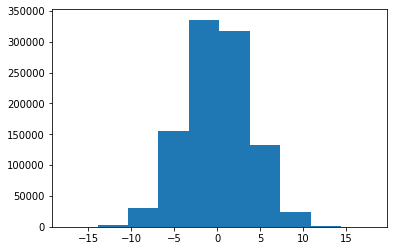

In [71]:
plt.hist(data["B"])

(array([ 99977., 100543., 100303.,  99743.,  99681.,  99594., 100488.,
         99677., 100086.,  99908.]),
 array([ 5.00007657,  7.70006007, 10.40004358, 13.10002708, 15.80001059,
        18.49999409, 21.1999776 , 23.8999611 , 26.59994461, 29.29992811,
        31.99991162]),
 <a list of 10 Patch objects>)

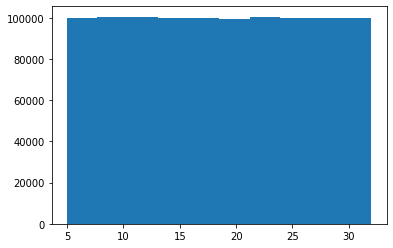

In [72]:
plt.hist(data["C"])

In [74]:
#generar variables categóricas o strings
data=pd.read_csv("../datasets/customer churn model/Customer Churn Model.txt")

In [75]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [76]:
column_names=data.columns.values.tolist()

In [77]:
a=len(column_names)
a

21

In [87]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a),
        
    }  , index=range(42,42+a) #si pongo esto empieza en cuarenta y dos y termina en 62
)

In [88]:
new_data #dos columnas con variables aleatorias con tercera columna con los nombres 

,Column Name,A,B
42,State,-0.890080,0.286173
43,Account Length,0.501185,0.666603
44,Area Code,-1.846558,0.767139
45,Phone,1.333920,0.993371
46,Int'l Plan,-0.141510,0.908948
47,VMail Plan,-0.749865,0.234196
48,VMail Message,0.540267,0.050022
49,Day Mins,-0.993361,0.571212
50,Day Calls,-0.333002,0.452631
51,Day Charge,0.433287,0.133497
